**Title**: Data Wrangling 10.2 Exercises  
**Author**: Ryan Weeks  
**Date**: 2/15/2025  
**Description**:  These exercises focus on analyzing stock data with Python utilizing the 'stock_analysis' package. They go through calculating financial metrics like volatility, Sharpe ratio, alpha, and beta using real stock data, and also compare stocks to see how they perform against things like market indices or risk-free rates. This was pretty cool getting really hands-on and developing a deeper understanding of stock performance and market trends!

In [2]:
import pandas as pd
import stock_analysis
import os

# Define file path
file_path = r"C:\Users\Weekseey\Documents\Bellevue Work\Data Wrangling"

start, end = '2019-01-01', '2020-12-31'

# Load data
bitcoin = pd.read_csv(os.path.join(file_path, "bitcoin.csv"), parse_dates=["date"], index_col="date")
sp = pd.read_csv(os.path.join(file_path, "sp500.csv"), parse_dates=["date"], index_col="date")

# Load FAANG stocks separately
fb = pd.read_csv(os.path.join(file_path, "facebook.csv"), parse_dates=["date"], index_col="date")
aapl = pd.read_csv(os.path.join(file_path, "apple.csv"), parse_dates=["date"], index_col="date")
amzn = pd.read_csv(os.path.join(file_path, "amazon.csv"), parse_dates=["date"], index_col="date")
nflx = pd.read_csv(os.path.join(file_path, "netflix.csv"), parse_dates=["date"], index_col="date")
goog = pd.read_csv(os.path.join(file_path, "google.csv"), parse_dates=["date"], index_col="date")

# Group FAANG stocks into a dictionary
faang = {
    "Facebook": fb,
    "Apple": aapl,
    "Amazon": amzn,
    "Netflix": nflx,
    "Google": goog
}

# Check if data loads correctly
print(bitcoin.head())
print(sp.head())
for stock, df in faang.items():
    print(f"{stock}:\n", df.head(), "\n")

                   high          low         open        close        volume  \
date                                                                           
2019-01-01  3850.913818  3707.231201  3746.713379  3843.520020  4.324201e+09   
2019-01-02  3947.981201  3817.409424  3849.216309  3943.409424  5.244857e+09   
2019-01-03  3935.685059  3826.222900  3931.048584  3836.741211  4.530215e+09   
2019-01-04  3865.934570  3783.853760  3832.040039  3857.717529  4.847965e+09   
2019-01-05  3904.903076  3836.900146  3851.973877  3845.194580  5.137610e+09   

              adj_close  
date                     
2019-01-01  3843.520020  
2019-01-02  3943.409424  
2019-01-03  3836.741211  
2019-01-04  3857.717529  
2019-01-05  3845.194580  
                   high          low         open        close      volume  \
date                                                                         
2019-01-02  2519.489990  2467.469971  2476.959961  2510.030029  3733160000   
2019-01-03  2493.139893

# Exercise 1

C:\Users\Weekseey\anaconda3\Lib\site-packages\stock_analysis\stock_analyzer.py:39: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  return self.data.last('1D').close.iat[0]
C:\Users\Weekseey\anaconda3\Lib\site-packages\stock_analysis\stock_analyzer.py:44: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  return self.data.last('1D').high.iat[0]
C:\Users\Weekseey\anaconda3\Lib\site-packages\stock_analysis\stock_analyzer.py:49: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  return self.data.last('1D').low.iat[0]


Text(0, 0.5, 'price ($)')

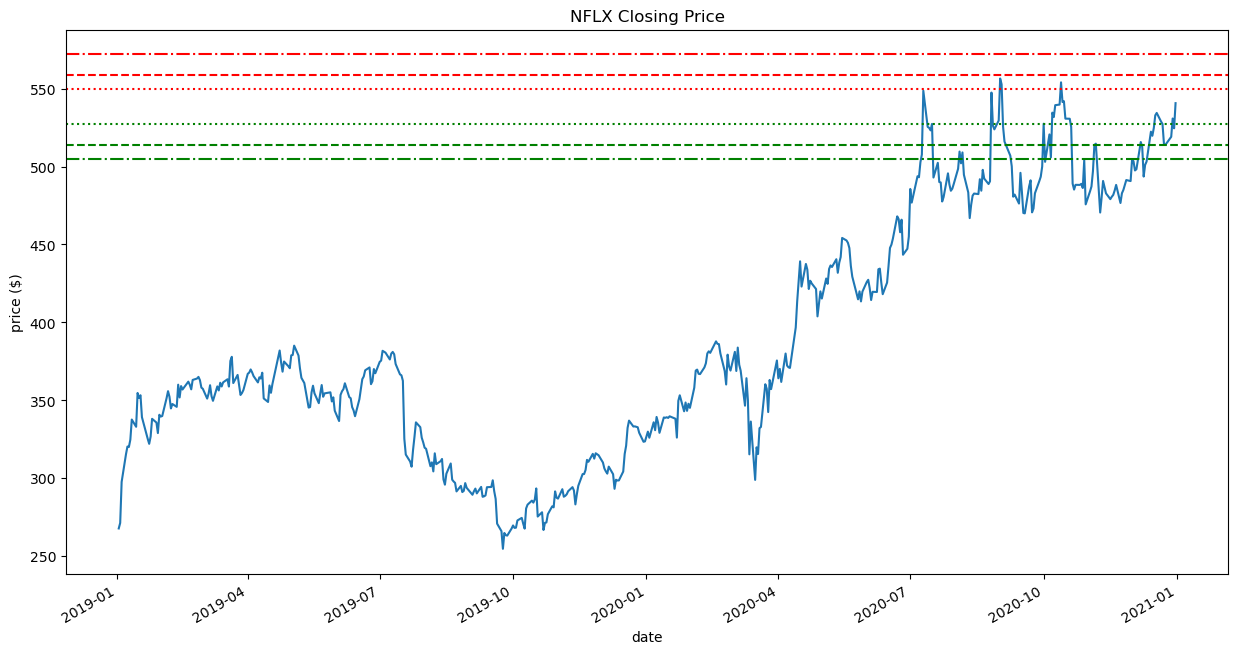

In [4]:
import itertools

def levels(analyzer, method):
    return [getattr(analyzer, method)(i) for i in range(1, 4)]

# calculate support/resistance levels
nflx_analyzer = stock_analysis.StockAnalyzer(nflx)
support_levels, resistance_levels = (
    levels(nflx_analyzer, metric) for metric in ['support', 'resistance']
)

nflx_viz = stock_analysis.StockVisualizer(nflx)
ax = nflx_viz.evolution_over_time('close', figsize=(15, 8), title='NFLX Closing Price')

for support, resistance, linestyle, level in zip(
    support_levels, resistance_levels, 
    [':', '--', '-.'], itertools.count(1)
):
    nflx_viz.add_reference_line(
        ax, 
        y=support, 
        label=f'support level {level}', 
        color='green', 
        linestyle=linestyle
    )
    nflx_viz.add_reference_line(
        ax, 
        y=resistance, 
        label=f'resistance level {level}', 
        color='red', 
        linestyle=linestyle
    )
ax.get_legend().remove()
ax.set_ylabel('price ($)')

# Exercise 2

C:\Users\Weekseey\anaconda3\Lib\site-packages\stock_analysis\stock_visualizer.py:586: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_effect = after_hours.resample('1M').sum()
C:\Users\Weekseey\anaconda3\Lib\site-packages\stock_analysis\stock_visualizer.py:586: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_effect = after_hours.resample('1M').sum()
C:\Users\Weekseey\anaconda3\Lib\site-packages\stock_analysis\stock_visualizer.py:586: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_effect = after_hours.resample('1M').sum()
C:\Users\Weekseey\anaconda3\Lib\site-packages\stock_analysis\stock_visualizer.py:586: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_effect = after_hours.resample('1M').sum()
C:\Users\Weekseey\anaconda3\Lib\site-packages\stock_

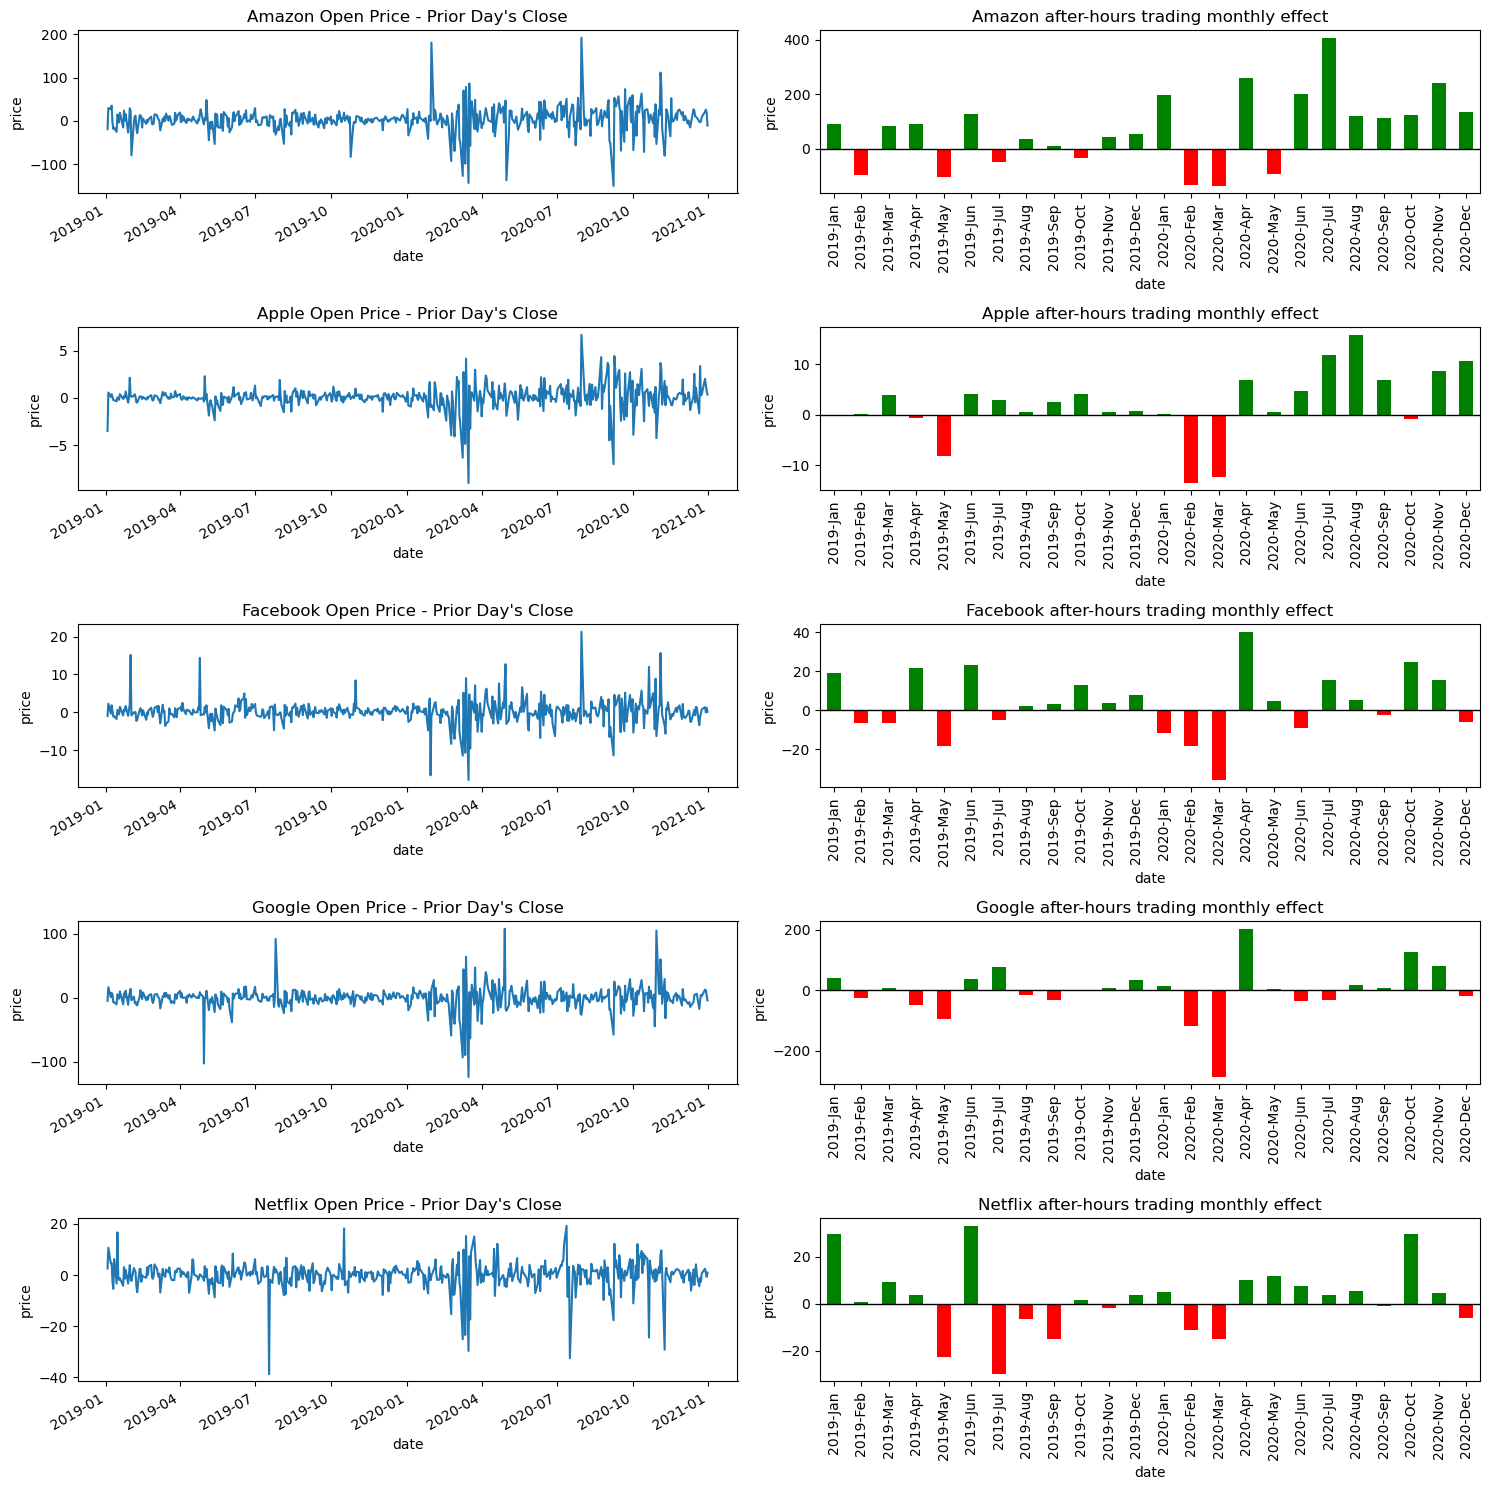

In [6]:
# Flatten the DataFrame to standardize column names for the visualizer
faang_combined = pd.concat(
    {stock: df[['open', 'high', 'low', 'close']] for stock, df in faang.items()},
    axis=0,  # Stack them vertically
)

# Reset index, renaming columns and adding 'name' column
faang_combined = faang_combined.reset_index().rename(columns={'level_0': 'stock', 'open': 'open', 'high': 'high', 'low': 'low', 'close': 'close'})
faang_combined['name'] = faang_combined['stock']  # Add the 'name' column for the visualizer

# Ensure the 'date' column is in datetime format and set as the index
faang_combined['date'] = pd.to_datetime(faang_combined['date'])
faang_combined.set_index('date', inplace=True)

# Now use it with AssetGroupVisualizer
try:
    stock_analysis.AssetGroupVisualizer(faang_combined).after_hours_trades()
except Exception as e:
    print(f"Error: {e}")

C:\Users\Weekseey\anaconda3\Lib\site-packages\stock_analysis\stock_visualizer.py:258: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_effect = after_hours.resample('1M').sum()


array([<Axes: title={'center': "After-hours trading\n(Open Price - Prior Day's Close)"}, xlabel='date', ylabel='price'>,
       <Axes: title={'center': 'After-hours trading monthly effect'}, xlabel='date', ylabel='price'>],
      dtype=object)

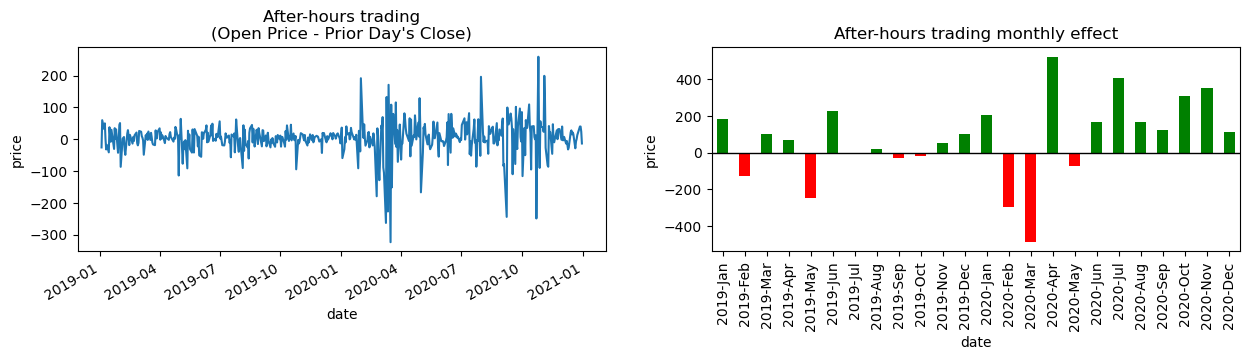

In [7]:
from stock_analysis.utils import make_portfolio

stock_analysis.StockVisualizer(make_portfolio(faang_combined)).after_hours_trades()

# Exercise 3

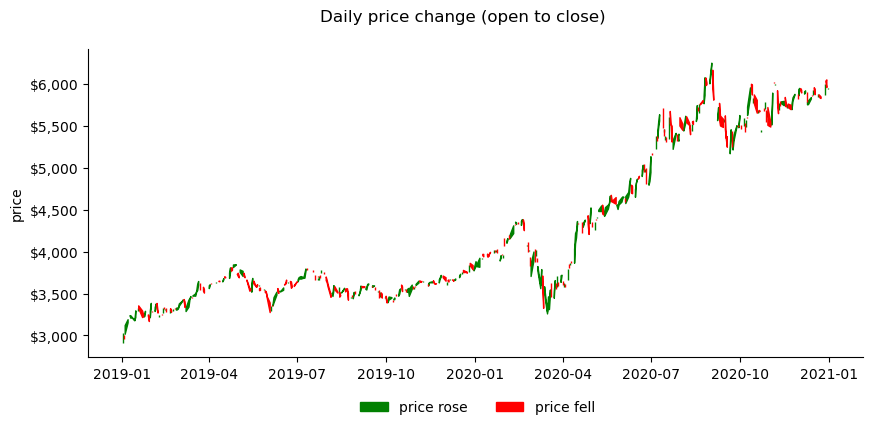

In [9]:
from matplotlib.ticker import StrMethodFormatter
from stock_analysis.utils import make_portfolio

ax = stock_analysis.StockVisualizer(make_portfolio(faang_combined)).open_to_close()
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

C:\Users\Weekseey\AppData\Local\Temp\ipykernel_16504\2568820846.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  close=lambda x: x['close'].fillna(method='ffill'),


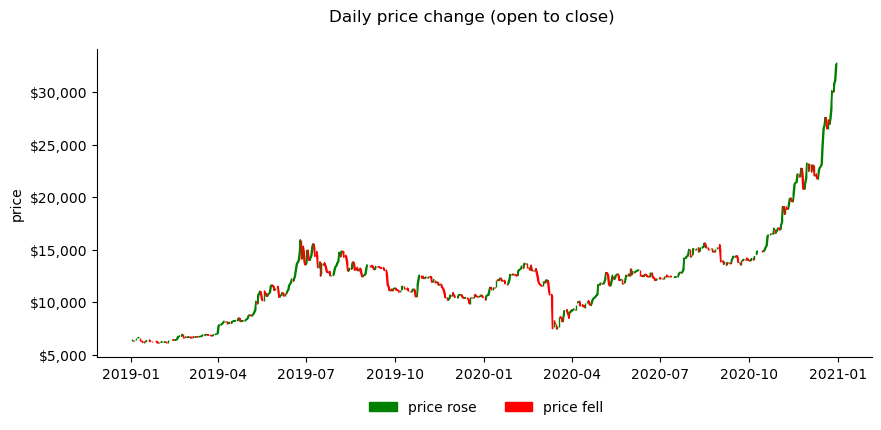

In [12]:
def reindex_stock_data(df):
    """Handles reindexing of stock data"""

    # Reindex and assign the missing values appropriately
    result = df.copy().reindex(
        pd.date_range(start, end=end, freq='D')
    ).assign(
        volume=lambda x: x['volume'].fillna(0) if 'volume' in x else 0,
        close=lambda x: x['close'].fillna(method='ffill'),
        open=lambda x: x['open'].combine_first(x['close']),
        high=lambda x: x['high'].combine_first(x['close']),
        low=lambda x: x['low'].combine_first(x['close'])
    )

    result.index.rename('date', inplace=True)
    return result

# Assuming 'sp' is a DataFrame, call the function
sp_reindexed = reindex_stock_data(sp)

# Visualize the stock data
import stock_analysis
from matplotlib.ticker import StrMethodFormatter

ax = stock_analysis.StockVisualizer(bitcoin + sp_reindexed).open_to_close()
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

# Exercise 4

In [35]:
import yfinance as yf

def get_stock_data(start, end):
    # Get data for the mutual fund and stocks
    fbalx = yf.download('FBALX', start=start, end=end)[['Open', 'High', 'Low', 'Close']]
    msft = yf.download('MSFT', start=start, end=end)[['Open', 'High', 'Low', 'Close']]
    aapl = yf.download('AAPL', start=start, end=end)[['Open', 'High', 'Low', 'Close']]
    amzn = yf.download('AMZN', start=start, end=end)[['Open', 'High', 'Low', 'Close']]

    # Rename columns to lowercase
    fbalx.columns = ['open', 'high', 'low', 'close']
    msft.columns = ['open', 'high', 'low', 'close']
    aapl.columns = ['open', 'high', 'low', 'close']
    amzn.columns = ['open', 'high', 'low', 'close']

    # Add a 'name' column to each DataFrame to indicate which stock the data belongs to
    fbalx['name'] = 'FBALX'
    msft['name'] = 'MSFT'
    aapl['name'] = 'AAPL'
    amzn['name'] = 'AMZN'

    # Add a 'ticker' column to each DataFrame
    fbalx['ticker'] = 'FBALX'
    msft['ticker'] = 'MSFT'
    aapl['ticker'] = 'AAPL'
    amzn['ticker'] = 'AMZN'

    # Combine the dataframes into one
    mutual_fund = pd.concat([fbalx, msft, aapl, amzn])

    return mutual_fund

# Get the stock data
mutual_fund = get_stock_data(start, end)

# Use the AssetGroupAnalyzer to analyze annualized volatility
analyzer = stock_analysis.AssetGroupAnalyzer(mutual_fund)
analyzer.analyze('annualized_volatility')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


{'AAPL': 0.46730613817697286,
 'AMZN': 0.3857342404436811,
 'FBALX': 0.2399554536777397,
 'MSFT': 0.4397112694347393}

# Exercise 5

In [47]:
def get_stock_metrics(ticker, start, end, benchmark_ticker='^GSPC', risk_free_rate=0.02):

    # Download stock data from Yahoo Finance
    stock_data = yf.download(ticker, start=start, end=end)[['Open', 'High', 'Low', 'Close']]
    benchmark_data = yf.download(benchmark_ticker, start=start, end=end)[['Open', 'High', 'Low', 'Close']]

    # Ensure column names are in lowercase
    stock_data.columns = ['open', 'high', 'low', 'close']
    benchmark_data.columns = ['open', 'high', 'low', 'close']

    # Create an instance of StockAnalyzer with the stock data
    stock_analyzer = stock_analysis.StockAnalyzer(stock_data)

    # Call the methods with the correct arguments
    alpha = stock_analyzer.alpha(index=benchmark_data, r_f=risk_free_rate)
    beta = stock_analyzer.beta(index=benchmark_data)
    sharpe_ratio = stock_analyzer.sharpe_ratio(r_f=risk_free_rate)  # Removed index here
    annualized_volatility = stock_analyzer.annualized_volatility()
    is_bear_market = stock_analyzer.is_bear_market()
    is_bull_market = stock_analyzer.is_bull_market()

    # Create a DataFrame with the results
    results = pd.DataFrame({
        'alpha': [alpha],
        'beta': [beta],
        'sharpe_ratio': [sharpe_ratio],
        'annualized_volatility': [annualized_volatility],
        'is_bear_market': [is_bear_market],
        'is_bull_market': [is_bull_market]
    })

    return results

# Example usage:
start = '2013-01-01'
end = '2023-01-01'
ticker = 'MSFT' 

metrics = get_stock_metrics(ticker, start, end)
print(metrics)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

      alpha      beta  sharpe_ratio  annualized_volatility  is_bear_market  \
0  7.587852  1.194936      2.634079               0.352515           False   

   is_bull_market  
0           False  



C:\Users\Weekseey\anaconda3\Lib\site-packages\stock_analysis\stock_analyzer.py:182: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start, end = df.close[0], df.close[-1]
C:\Users\Weekseey\anaconda3\Lib\site-packages\stock_analysis\stock_analyzer.py:232: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  self.cumulative_returns().last('1D').iat[0] - r_f
C:\Users\Weekseey\anaconda3\Lib\site-packages\stock_analysis\stock_analyzer.py:210: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  return self.portfolio_return(self.data.last('2M')) <= -.2
C:\Users\Weekseey\anaconda3\Lib\site-packages\stock_analysis\stock_analyzer.py:210: FutureWarning: 'M' is 